In [3]:
import matplotlib.pyplot as plt
log=r"C:\Users\User\Downloads\temperature.txt"
with open(log, 'r') as file:
    lines = file.readlines()
lines = [line.strip() for line in lines]
print(lines)
print (f'length of dataset = {len(lines)}') #tells you how many lines of data you have and thus how many seconds
mins=len(lines)/60
print(f'Number of mins of data recorded = {mins}') #tells you how many minutes of data you have
print(f'Number of hours of data recorded = {mins/60}') #tells you how many hours of data you have


['Starting new set of measurements', '0', 'Starting new set of measurements', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'Starting new set of measurements', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '2', '4', '0', '0', '0', '1', '0', '4', '0', '0', '0', '4', '0', '0', '0', '0', '4', '6', '0', '0', '0', '0', '1', '0', '0', '0', '3', '0', '5', '3', '0', '1', '0', '0', '3', '3', '0', '0', '0', '4', '0', '0', '0', '4', '3', '0', '6', '0', '7', '0', '2', '3', '2', '4', '0', '0', '0', '5', '3', '6', '0', '1', '3', '0', '0', '2', '0', '0', '0', '0', '7', '0', '0', '0', '7', '0', '0', '0', '0', '0', '0', '8', '13', '12', '5', '3', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '2', '2', '1', '0', '4', '1', '0', '0', '0', '4', '2', '4', '0', '2', '0', '0', '0', '0', '2', '0', '0', '6', '2', '0', '3', '3', '0', '0', '2', '0', '1', '0', '2', '4', '0', '5', '2', '2', '0', '0', '0', '7', '0', '0', '3', '1', '0', '5', '3', '0', '4',

In [4]:
##this preprocessing step removes any non-numeric values from the dataset (creds to chatgot for helping to debug this)
##it imputes the missing values (i.e., the lines where it says 'Starting new set of measurements'): it takes the one before and the one after and averages them
##This is a basic imputation method, but helps make your analysis pipeline easier.

import numpy as np
data=[]
for i, element in enumerate(lines):
    try:
        data.append(float(element))
    except ValueError:
        try:
            prev_val=float(lines[i-1]) if i > 0 else 0
        except ValueError:
            prev_val=0
    try:
        next_val = float(lines[i + 1]) if i < len(lines) - 1 else 0
    except ValueError:
        next_val = 0
    imputed_value = (prev_val + next_val) / 2
    data.append(imputed_value)

for element in data: ##if there are any non-numeric values in the dataset, it will print 'ALERT'
    if type(element) != float:
        print("ALERT")

In [5]:
#so now you have a list of floats that we can plot and do silly things with.
#this bit will install dependencies if you don't have them already
!pip install numpy #using ! runs what's called a shell command: it's like i'm speaking directly to the computer
!pip install matplotlib
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ERROR: Invalid requirement: '#using': Expected package name at the start of dependency specifier
    #using
    ^


Text(0.5, 1.0, 'VOC concentration over time in seconds')

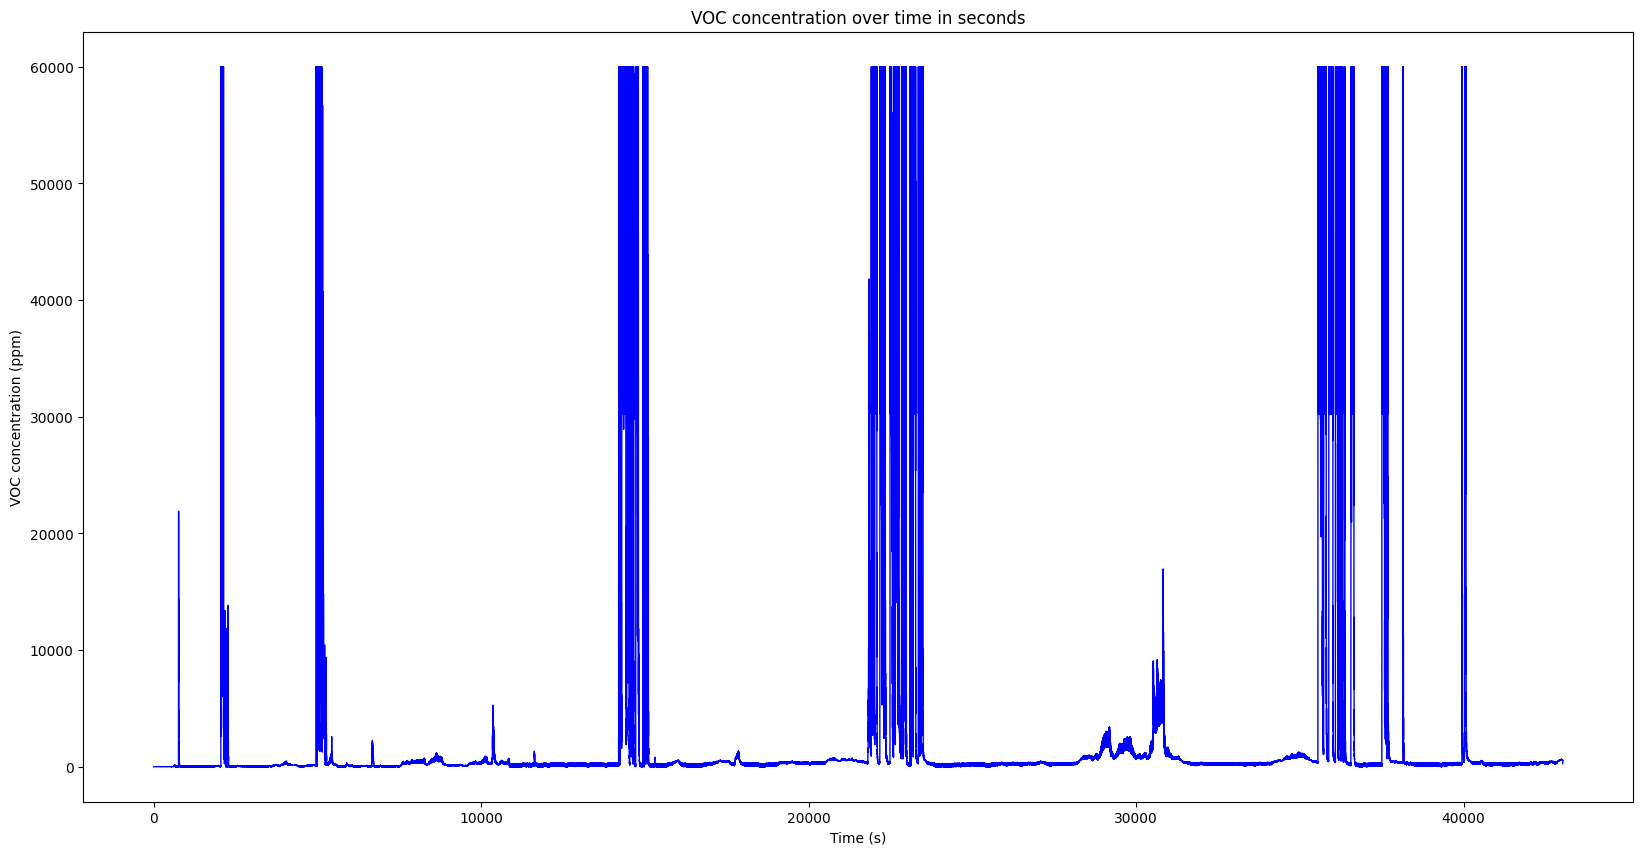

In [6]:
figure = plt.figure(figsize=(20, 10)) #this sets the size of the figure
plt.plot(data, color='blue', linewidth=1.0) #this plots the data
plt.xlabel('Time (s)') #this labels the x axis.
plt.ylabel('VOC concentration (ppm)') #this labels the y axis
plt.title('VOC concentration over time in seconds') #this labels the title of the plot


In [7]:
#so noisy data sucks. We can smooth it out a bit by taking average VOC concentrations over minutes.
def split_list_simple(my_list, chunk_size): #i googled this function btw i hate defining functions
    chunks = []
    for i in range(0, len(my_list), chunk_size):
        chunks.append(my_list[i:i + chunk_size])
    return chunks

data_per_chunk=split_list_simple(data, 60) #this splits the data into chunks of 1 minute. You can change this to 120 for 2 minutes, etc.
print(data_per_chunk)
averaged_data = []
for interval in data_per_chunk:
    averaged_data.append(sum(interval)/len(interval)) #this takes the average of each chunk of data
print(averaged_data)
print(len(averaged_data))## just to check that the averaging worked


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 2.0, 2.0, 4.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 3.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5, 3.0, 0.0, 0.0, 2.5, 5.0, 1.5, 3.0, 0.0, 0.0, 0.5, 1.0], [0.0, 0.0, 0.0, 0.0, 1.5, 3.0, 1.5, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 1.5, 3.0, 0.0, 0.0, 3.0, 6.0, 0.0, 0.0, 3.5, 7.0, 0.0, 0.0, 1.0, 2.0, 1.5, 3.0, 1.0, 2.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 5.0, 1.5, 3.0, 3.0, 6.0, 0.0, 0.0, 0.5, 1.0], [1.5, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5, 7.0, 0.

Text(0.5, 1.0, 'AGGREGATED VOC concentration over time in minutes')

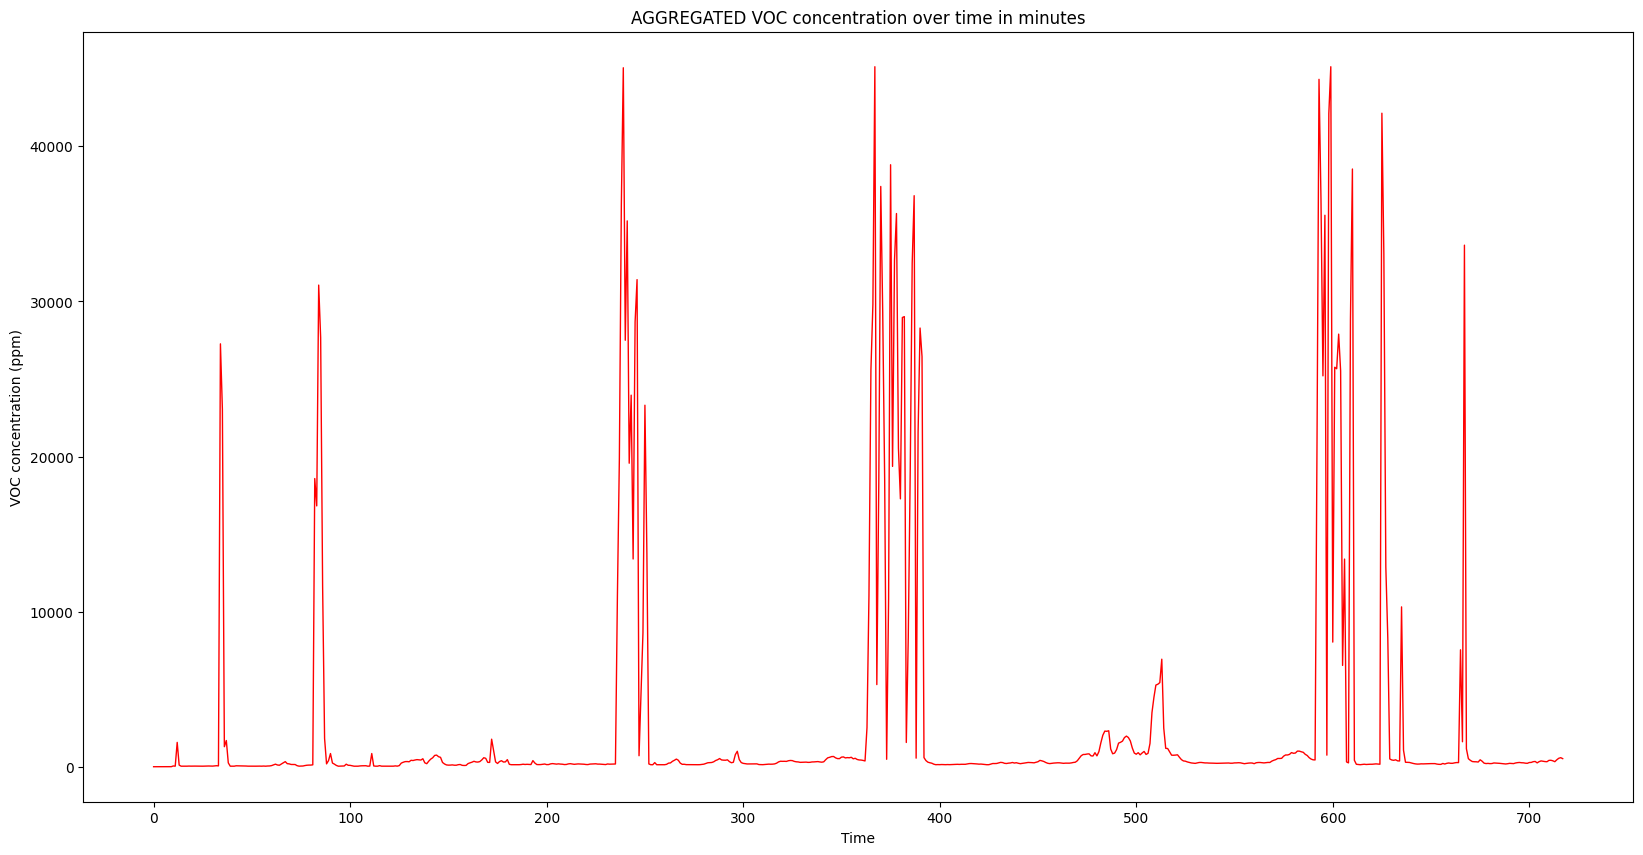

In [8]:
figure = plt.figure(figsize=(20, 10)) #this sets the size of the figure
plt.plot(averaged_data, color='red', linewidth=1.0) #this plots the data
plt.xlabel('Time') #this labels the x axis. Note that due to us previously removing the first 14 lines of data and then condensing any strings to 0.0, the x axis is not quite accurate to the second: we've distorted when the data begins at the start of the plot
plt.ylabel('VOC concentration (ppm)') #this labels the y axis
plt.title('AGGREGATED VOC concentration over time in minutes') #this labels the title of the plot

[[  0.    0.    0.  ... 546.5 575.  259. ]]


Text(0.5, 1.0, 'VOC concentration (ppm) over the course of a platoon attack')

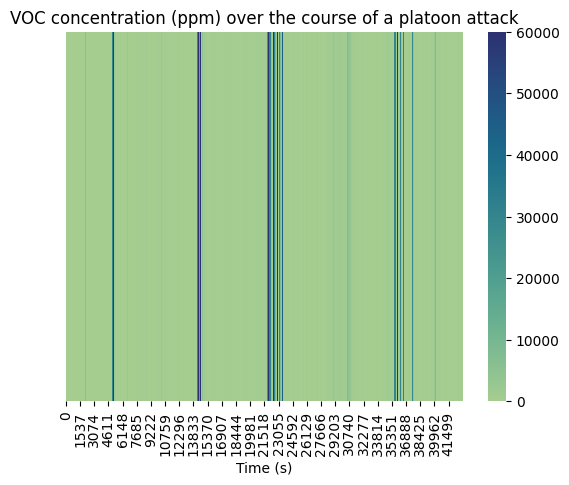

In [9]:
import seaborn as sns
data_array = np.array(data).reshape(1,-1)
print(data_array)
map = sns.heatmap(data_array, cmap='crest', cbar=True, yticklabels=False)
plt.xlabel('Time (s)')
plt.title('VOC concentration (ppm) over the course of a platoon attack') #this labels the y axis

Text(0.5, 1.0, 'VOC concentration (ppm) over the course of a platoon attack - averaged')

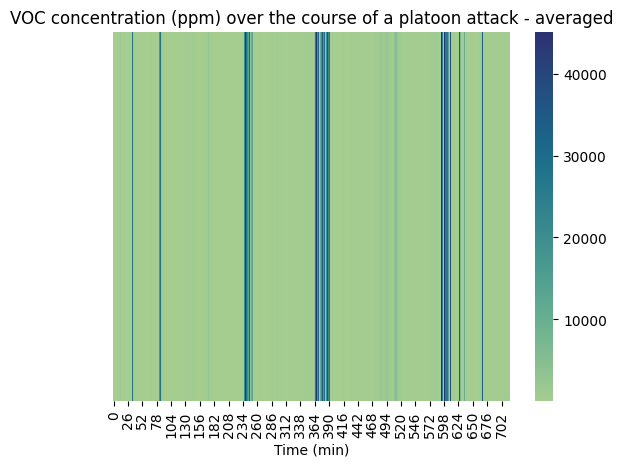

In [10]:
import seaborn as sns
avg_data_array = np.array(averaged_data).reshape(1,-1)
map = sns.heatmap(avg_data_array, cmap='crest', cbar=True, yticklabels=False)
plt.xlabel('Time (min)')
plt.title('VOC concentration (ppm) over the course of a platoon attack - averaged') #this labels the y axis

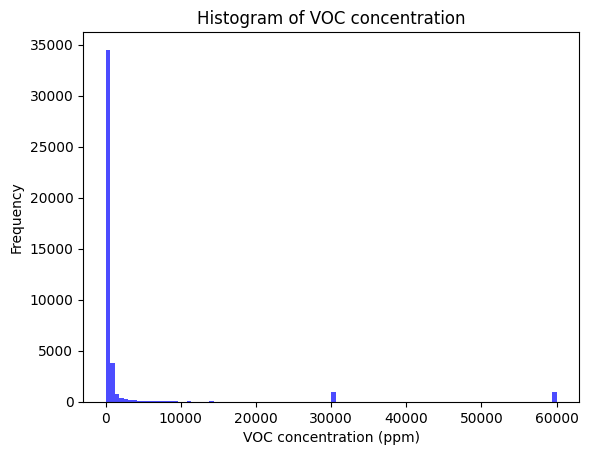

In [11]:
plt.hist(data, bins=100, color='blue', alpha=0.7) #this plots a histogram of the data
plt.xlabel('VOC concentration (ppm)') #this labels the x axis
plt.ylabel('Frequency') #this labels the y axis
plt.title('Histogram of VOC concentration') #this labels the title of the plot
plt.show() #this shows the plot

##NB: the y axis of this histogram seems off? We had 21000ish lines of data but this y axis goes to 35000

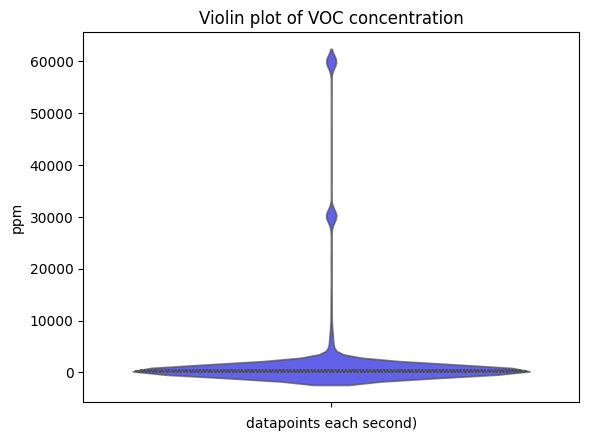

In [ ]:
sns.violinplot(data=data,inner='quartile', color='blue', alpha=0.7) #this plots a violin plot of the data
plt.xlabel('datapoints (each second)') #this labels the x axis
plt.ylabel('ppm') #this labels the y axis
plt.title('Violin plot of VOC concentration') #this labels the title of the plot
plt.show() #this shows the plot

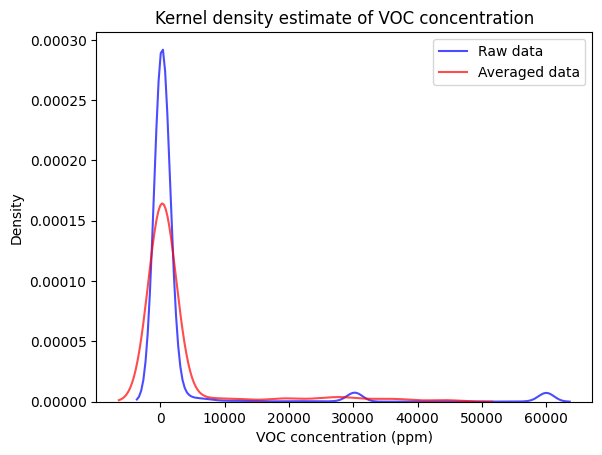

In [13]:
sns.kdeplot(data, color='blue', alpha=0.7) #this plots a kernel density estimate of the data
sns.kdeplot(averaged_data, color='red', alpha=0.7) #this plots a kernel density estimate of the averaged data
plt.xlabel('VOC concentration (ppm)') #this labels the x axis
plt.ylabel('Density') #this labels the y axis
plt.title('Kernel density estimate of VOC concentration') #this labels the title of the plot
plt.legend(['Raw data', 'Averaged data']) #this adds a legend to the plot
plt.show() #this shows the plot

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch


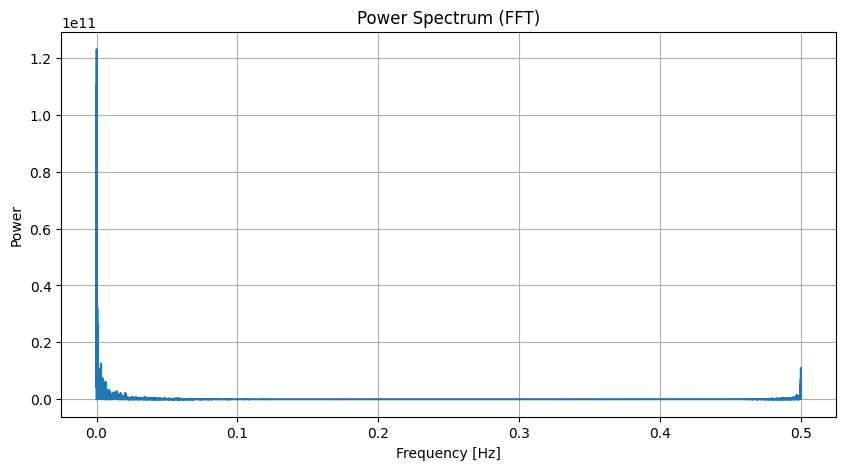

In [15]:
voc_data_array = np.array(data)# your list of floats
sampling_rate = 1  # Hz (adjust this if data is per millisecond: e.g., 1000 Hz)
voc_data = voc_data_array - np.mean(voc_data_array)
N = len(voc_data)
yf = fft(voc_data)
xf = fftfreq(N, 1 / sampling_rate)  # frequency axis
power = np.abs(yf)**2 / N
plt.figure(figsize=(10, 5))
plt.plot(xf[:N // 2], power[:N // 2])
plt.title("Power Spectrum (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.grid(True)
plt.show()

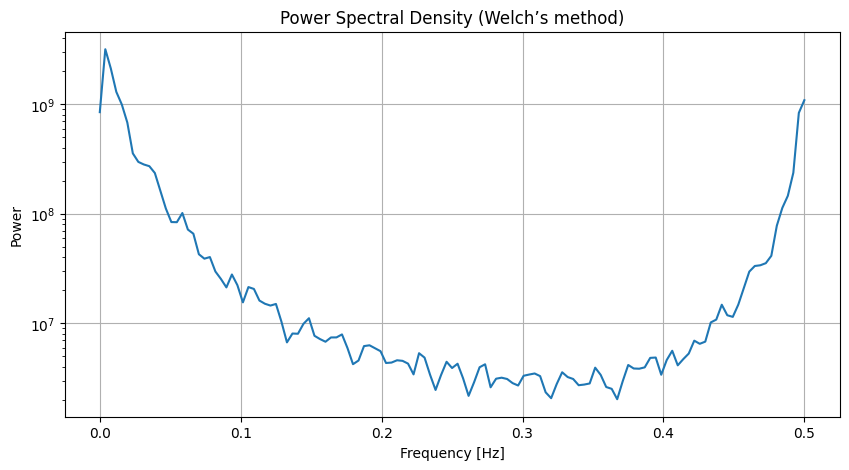

In [16]:
frequencies, power = welch(voc_data, fs=sampling_rate, nperseg=256)

plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, power)
plt.title("Power Spectral Density (Welch’s method)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.grid(True)
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_fastica.py:598: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


NameError: name 'X' is not defined

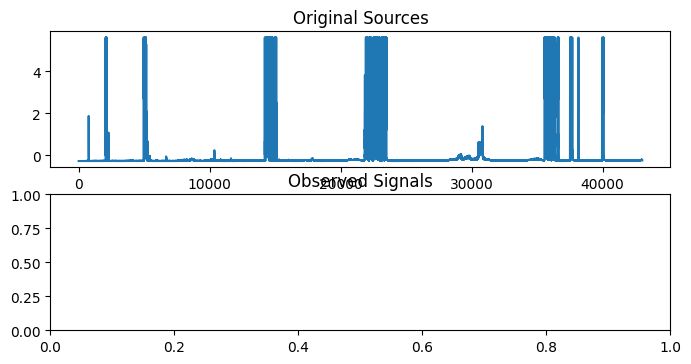

In [18]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

ica = FastICA(n_components=3)
S_ = ica.fit_transform(data_array.reshape(-1, 1))

plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()